Assignment: Binary Classification with Logistic Regression

In this assignment, you will work with the Iris dataset to perform binary classification using logistic regression. The Iris dataset contains samples from three different species of iris flowers, but for this assignment, you will focus on classifying Iris Setosa (class 0) versus the combination of the other two classes (class 1).

Here are the steps you need to follow for this assignment:

Step 1: Load the Iris dataset

Load the Iris dataset using sklearn.datasets.load_iris().
Extract the feature matrix X and the target vector y.


Step 2: Preprocess the data

To convert this problem into binary classification, create a new target vector y_binary where Iris Setosa (class 0) is labeled as 1, and the other two classes are labeled as 0.


Step 3: Split the dataset

Split the dataset into training and testing sets using train_test_split() from sklearn.model_selection.
Use 80% of the data for training and 20% for testing. Set the random_state to ensure reproducibility.

Step 4: Define the cost function (logistic loss)

Implement the logistic loss function, which calculates the cost of your model's predictions.

Step 5: Define the training function

Implement a training function that uses gradient descent to optimize the logistic regression model.
The function should take input data, learning rate, number of iterations, and regularization parameter as arguments.

Step 6: Train the model

Use the training function to train your logistic regression model on the training data.
Obtain the weight vector W and bias term b.


Step 7: Define the prediction function

Implement a prediction function that takes input data and the trained model's weights and bias.
The prediction function should use the logistic sigmoid function to make binary predictions (0 or 1).


Step 8: Predict on the test set

Use the prediction function to predict the classes for the test set X_test using the obtained weights and bias.


Step 9: Evaluate the model's performance

Calculate the accuracy of your model using accuracy_score() from sklearn.metrics.
Generate the confusion matrix using confusion_matrix() from sklearn.metrics.
Generate the classification report using classification_report() from sklearn.metrics.
Print out the accuracy, confusion matrix, and classification report to evaluate your model's performance.
Make sure to comment your code and provide explanations for each step. This assignment will help you understand the basics of binary classification, logistic regression, and how to evaluate the performance of your model using various metrics.

In [1]:
import numpy as np
from sklearn.datasets import load_iris

# Step 1: Load the Iris dataset
iris = load_iris()




In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def logistic_loss(y_true, y_pred):
  loss = np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
  loss /= -len(y_true)
  return loss

def train_logistic_regression(X, y, learning_rate, max_iter, regularization_param):
  # Initialize the weights and bias.
  W = np.zeros(X.shape[1])
  b = 0

  # Perform gradient descent.
  for i in range(max_iter):
    # Calculate the predictions.
    y_pred = sigmoid(np.dot(X, W) + b)

    # Calculate the gradient.
    gradient = X.T @ (y_pred - y) + 2 * regularization_param * W

    # Update the weights and bias.
    W -= learning_rate * gradient
    b -= learning_rate * np.mean(y_pred - y)

  return W, b

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def predict(X, W, b):
  y_pred = sigmoid(np.dot(X, W) + b)
  y_pred = np.where(y_pred >= 0.5, 1, 0)
  return y_pred

# Load the Iris dataset.
X, y = load_iris(return_X_y=True)

# Preprocess the data.
y_binary = np.where(y == 0, 1, 0)

# Split the dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Train the logistic regression model.
W, b = train_logistic_regression(X_train, y_train, learning_rate=0.01, max_iter=1000, regularization_param=0.001)

# Predict on the test set.
y_pred = predict(X_test, W, b)

# Evaluate the model's performance.
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion matrix:", confusion_matrix)
print("Classification report:", classification_report)


Accuracy: 1.0
Confusion matrix: [[20  0]
 [ 0 10]]
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



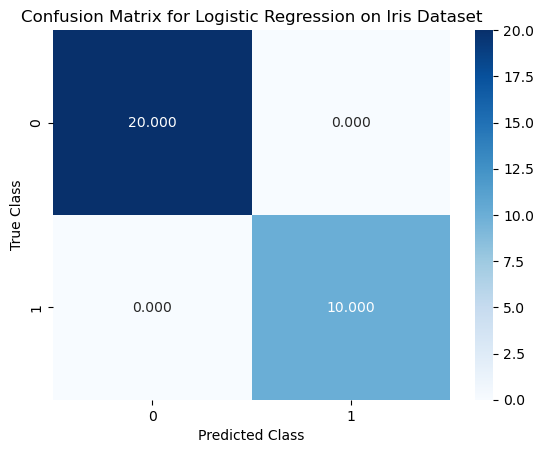

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the confusion matrix plot.
sns.heatmap(confusion_matrix, annot=True, fmt=".3f", cmap="Blues")
plt.title("Confusion Matrix for Logistic Regression on Iris Dataset")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()
